In [1]:
import matplotlib.pyplot as plt

from summer2 import CompartmentalModel
from summer2.parameters import Parameter, DerivedOutput

In [2]:
def build_sis_model(
    config: dict,
) -> CompartmentalModel:
    
    # Model characteristics
    compartments = (
        "susceptible",
        "infectious",
    )
    analysis_times = (
        config["start_time"], 
        config["end_time"],
    )
    model = CompartmentalModel(
        times=analysis_times,
        compartments=compartments,
        infectious_compartments=["infectious"],
    )
    model.set_initial_population(
        distribution=
        {
            "susceptible": config["population"] - config["seed"], 
            "infectious": config["seed"],
        }
    )
    
    # Transitions
    model.add_infection_frequency_flow(
        name="infection", 
        contact_rate=Parameter("contact_rate"),
        source="susceptible", 
        dest="infectious",
    )
    model.add_transition_flow(
        name="recovery", 
        fractional_rate=Parameter("recovery"),
        source="infectious", 
        dest="susceptible",
    )
    
    # Outputs
    model.request_output_for_compartments(
        "infectious",
        ["infectious"],
        save_results=False,
    )
    model.request_output_for_compartments(
        "total",
        compartments,
        save_results=False,
    )
    model.request_function_output(
        "prevalence",
        DerivedOutput("infectious") / DerivedOutput("total")
    )
    
    return model

In [3]:
model_config = {
    "start_time": 0.,
    "end_time": 10. * 365.,
    "population": 1.,
    "seed": 0.01,
}

parameters = {
    "recovery": 6. / 365.,
    "contact_rate": 0.75 / 365.,
}

In [4]:
sis_model = build_sis_model(model_config)
sis_model.run(parameters=parameters, solver="euler")
prevalence = sis_model.get_derived_outputs_df()["prevalence"]

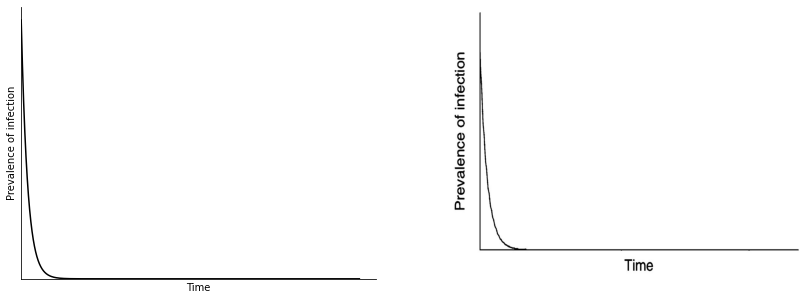

In [5]:
fig, (left_ax, right_ax) = plt.subplots(1, 2, figsize=(14, 5))

left_ax.plot(
    prevalence.index,
    prevalence,
    color="k",
)
left_ax.set_xlim(left=0.)
left_ax.set_xticks([])
left_ax.set_xlabel("Time")
left_ax.set_ylim(bottom=0.)
left_ax.set_yticks([])
left_ax.set_ylabel("Prevalence of infection")
left_ax.spines.top.set_visible(False)
left_ax.spines.right.set_visible(False)

image = plt.imread("./figures/fig_8_5.jpg")
right_ax.axis("off")
right_ax.imshow(image, aspect="auto");